## Техническое задание

**Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.**

## Описание услуг

**<u>Оператор предоставляет два основных типа услуг:</u>**

1. **Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.**


2. **Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).**


**<u>Также доступны такие услуги:</u>**

- **Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);**


- **Выделенная линия технической поддержки (*TechSupport*);**


- **Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);**


- **Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).**


**За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.**

## Описание данных

**<u>Данные состоят из файлов, полученных из разных источников:</u>**

- **`contract.csv` — информация о договоре;**


- **`personal.csv` — персональные данные клиента;**


- **`internet.csv` — информация об интернет-услугах;**


- **`phone.csv` — информация об услугах телефонии.**


**Во всех файлах столбец `customerID` содержит код клиента.**

**Информация о договорах актуальна на 1 февраля 2020.**


**<u>Описание полей:</u>**

- **BeginDate – дата начала пользования услугами**


- **EndDate – дата окончания пользования услугами**


- **Type – тип оплаты: ежемесячный, годовой и тд**


- **PaperlessBilling – безналичный расчет**


- **PaymentMethod – способ оплаты**


- **MonthlyCharges – ежемесячные траты на услуги**


- **TotalCharges – всего потрачено денег на услуги**


- **Dependents – наличие иждивенцев**


- **Senior Citizen – наличие пенсионного статуса по возрасту**


- **Partner – наличие супруга(и)**


- **MultipleLines – наличие возможности ведения параллельных линий во время звонка**

## План работ

 1. **<u>Изучение технического задания и постановка задачи.</u>**
 
    Уточнение запроса и формирование образа конечного результата.
     
 
 2. **<u>Изучение полученных данных.</u>**
 
 
 3. **<u>Предобработка данных.</u>**
 
    Найти и устранить ошибки в данных (пропуски, дубликаты, не корректный формат данных).


 4. **<u>Исследовательский анализ данных.</u>**
 
    Предпологает построение графиков по данным. Такая визуализация позволит увидеть особенности, закономерности и     аномалии. Сделанные наблюдения помогут разобраться в результатах проведенного анализа.


 5. **<u>Подготовка данных.</u>**
 
    Включает генерирование дополнительных признаков для улучшения качества обучения будущей модели( В том числе разметка целевого признака), кодирование категориальных признаков, формирование конечного набора данных для последующего обучения моделей.(удаление не значимых признаков). Разбиение данных на выборки, если потребуется.


6. **<u>Подготовка прототипа решения.</u>**

   Изучение моделей машинного обучения, выбор моделей и методов обучения, подбор гиперпараметров, проверка результатов на валидационной выборке.
   
   
7. **<u>Проверка моделей (Тестирование).</u>**

   Сравнительный анализ моделей, определение эффективной модели( лучшего результата и быстродействия).


8. **<u>Общий вывод.</u>**


9. **<u>Оформление результатов.</u>**

### Библиотеки

In [1]:
# conda install lightgbm
# conda install catboost

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import re
import time


import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

### Изучение полученных данных.

**Загрузим полученные наборы данных и посмотрим на их содержимое.**

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

contract = pd.read_csv('/Users/greygreywolf/Downloads/final_provider/contract.csv')
personal = pd.read_csv('/Users/greygreywolf/Downloads/final_provider/personal.csv')
internet = pd.read_csv('/Users/greygreywolf/Downloads/final_provider/internet.csv')
phone = pd.read_csv('/Users/greygreywolf/Downloads/final_provider/phone.csv')

In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


 - **Пропусков нет**


 - **Формат в колонках BeginDate и EndDate необходимо заменить на datetime64**


 - **Формат колонки TotalCharges заменить на float64**

In [6]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


 - **Пропусков нет**
 
 
 - **В колонке SeniorCitizen изменить значения 0/1 на Yes/No**

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


- **Пропусков нет**

In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [11]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


- **Пропусков нет**

**Сравним количество записей в наборах данных между собой.**

In [12]:
for key, value in {'conract': contract, 'personal': personal, 'phone': phone, 'internet': internet}.items():
    print(f'\nКоличество записей в "{key.upper()}" - {value.shape[0]}' )


Количество записей в "CONRACT" - 7043

Количество записей в "PERSONAL" - 7043

Количество записей в "PHONE" - 6361

Количество записей в "INTERNET" - 5517


### Отчет

1. **Внутри каждого набора данных отсутствуют пропуски. Но в общем сравнении датасетов между собой количество записей не совпадает. В датасетах phone и internet содержится меньшее количетсво записей, чем в conract и personal. Причина не соответсвия  количества записей может быть в том, что этими услугами некоторые абоненты не пользовались.**


2. **Названия колонок в датасетах необходимо скорректировать с учетом метода "snake_case".**


3. **Формат в колонках BeginDate и EndDate датасета "contract" необходимо заменить на datetime64**


4. **Тип данных колонки TotalCharges датасета "contract" заменить на float64**


5. **В колонке SeniorCitizen датасета "personal" изменить значения 0/1 на Yes/No**


6. **Для удобства использования изменить регистр содержимого всех наборов данных на нижний**


7. **Не обнаружен целевой признак.**

### Предобработка данных.

**Для удобства дальнейшего использования, учитывая, что данных немного, соеденим все наборы в один датасет.**

In [13]:
full_df = contract.set_index('customerID').join(phone.set_index('customerID'))
full_df = full_df.join(personal.set_index('customerID'))
full_df = full_df.join(internet.set_index('customerID'))

In [14]:
del personal, internet, contract, phone

**Избавимся от образовавшихся пропусков в получившемся наборе.**

In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   MultipleLines     6361 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null 

**Пропуски для колонок из "internet" и "phone", означающие, что такие услуги пользователям не оказывались, заменим на "No".**

In [16]:
full_df.fillna('no', inplace=True)
print('\nКоличество пропусков в общем наборе данных -', full_df.isna().sum().sum())


Количество пропусков в общем наборе данных - 0


In [17]:
full_df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,no,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,no,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No


**Теперь скорректируем названия колонок по методу snake_case.**

In [18]:
full_df.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [19]:
new_names = []
old_names = full_df.columns
for old_name in old_names:
    index_second_capital_letter = re.search(r'^([^A-Z]*[A-Z]){2}', old_name)
    if index_second_capital_letter is not None:
        new_name = old_name[:(index_second_capital_letter.span()[1] - 1)] + '_' + old_name[(index_second_capital_letter.span()[1] - 1):]
        new_names.append(new_name)
    else:
        new_names.append(old_name)

In [20]:
print('Новые названия\n')
print(new_names)

Новые названия

['Begin_Date', 'End_Date', 'Type', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Multiple_Lines', 'gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']


In [21]:
for i in range(len(full_df.columns)):
    full_df.rename(columns={f'{old_names[i]}' : f'{new_names[i].lower()}'}, inplace=True)

In [22]:
del old_names, new_names

In [23]:
full_df.index.rename('customer_id', inplace=True)

In [24]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7043 non-null   object 
 1   end_date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless_billing  7043 non-null   object 
 4   payment_method     7043 non-null   object 
 5   monthly_charges    7043 non-null   float64
 6   total_charges      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support  

**Заменим формат данных для колонок "begin_date", "end_date".**

**Пропуски в колонке end_date заменим датой окочания датасета "2020-02-01". Такой способ упростит работу с колонкой в дальнейшем. Аномальные значения обнаружим добавив в метод аргумент errors='coerce'.**

In [25]:
full_df['begin_date'] = full_df['begin_date'].astype('datetime64[M]')
full_df['end_date'] = pd.to_datetime(full_df['end_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
full_df['end_date'] = full_df['end_date'].fillna('2020-02-01')
full_df['end_date'] = full_df['end_date'].astype('datetime64[M]')

**Заменим тип данных для колонки "total_charges".**


**По умолчанию не известно, какие значения есть в столбце. Поэтому, сначала преобразуем все значения к числовому типу с помощью метода pd.to_numeric, а аномальные значения обнаружим добавив в метод аргумент errors='coerce'.**

In [26]:
full_df['total_charges'] = pd.to_numeric(full_df['total_charges'], errors='coerce')

In [27]:
print('\nКоличество пропусков в столбце -', full_df['total_charges'].isna().sum())


Количество пропусков в столбце - 11


In [28]:
full_df[full_df['total_charges'].isna()].style.highlight_null(null_color='red')

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
customer_id,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,Yes,Bank transfer (automatic),52.550000,nan,no,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No
3115-CZMZD,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,20.250000,nan,No,Male,0,No,Yes,no,no,no,no,no,no,no
5709-LVOEQ,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,80.850000,nan,No,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes
4367-NUYAO,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,25.750000,nan,Yes,Male,0,Yes,Yes,no,no,no,no,no,no,no
1371-DWPAZ,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Credit card (automatic),56.050000,nan,no,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No
7644-OMVMY,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,19.850000,nan,No,Male,0,Yes,Yes,no,no,no,no,no,no,no
3213-VVOLG,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,25.350000,nan,Yes,Male,0,Yes,Yes,no,no,no,no,no,no,no
2520-SGTTA,2020-02-01 00:00:00,2020-02-01 00:00:00,Two year,No,Mailed check,20.000000,nan,No,Female,0,Yes,Yes,no,no,no,no,no,no,no
2923-ARZLG,2020-02-01 00:00:00,2020-02-01 00:00:00,One year,Yes,Mailed check,19.700000,nan,No,Male,0,Yes,Yes,no,no,no,no,no,no,no


**Графа общие расходы не содержит значения для клиентов, которые присоеденились недавно. Заменим пропуски в столбце на значение из "monthly_charges"**

In [29]:
full_df.loc[full_df['total_charges'].isna(), 'total_charges'] = full_df[full_df['total_charges'].isna()]['monthly_charges']
print('\nКоличество пропусков в столбце -', full_df['total_charges'].isna().sum())
print('\nТип данных столбца "total_charges" -', full_df['total_charges'].dtype)


Количество пропусков в столбце - 0

Тип данных столбца "total_charges" - float64


**Заменим в графе senior_citizen значения 0/1 на yes/no**

In [31]:
full_df['senior_citizen'] = full_df['senior_citizen'].replace(0, 'No')
full_df['senior_citizen'] = full_df['senior_citizen'].replace(1, 'Yes')

In [32]:
print('\nУникальные значение в стоблце "senior_citizen" -', full_df['senior_citizen'].unique())


Уникальные значение в стоблце "senior_citizen" - ['No' 'Yes']


**Изменим регистр содержимого датасета на нижний**

In [33]:
for column in full_df.columns:
    if (full_df[column].dtype == 'object') and (column != 'end_date'):
        full_df[column] = full_df[column].str.lower()

In [34]:
full_df.tail()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
customer_id,,,,,,,,,,,,,,,,,,,
6840-RESVB,2018-02-01,2020-02-01,one year,yes,mailed check,84.80,1990.50,yes,male,no,yes,yes,dsl,yes,no,yes,yes,yes,yes
2234-XADUH,2014-02-01,2020-02-01,one year,yes,credit card (automatic),103.20,7362.90,yes,female,no,yes,yes,fiber optic,no,yes,yes,no,yes,yes
4801-JZAZL,2019-03-01,2020-02-01,month-to-month,yes,electronic check,29.60,346.45,no,female,no,yes,yes,dsl,yes,no,no,no,no,no
8361-LTMKD,2019-07-01,2019-11-01,month-to-month,yes,mailed check,74.40,306.60,yes,male,yes,yes,no,fiber optic,no,no,no,no,no,no
3186-AJIEK,2014-08-01,2020-02-01,two year,yes,bank transfer (automatic),105.65,6844.50,no,male,no,no,no,fiber optic,yes,no,yes,yes,yes,yes


**Посмотрим, есть ли в датасете явные дубликаты**

In [35]:
print('\nКоличество явных дубликатов в наборе -', full_df.index.duplicated().sum())


Количество явных дубликатов в наборе - 0


**Убедимся, что в значениях других колонок нет аномалий.**

In [36]:
for column in full_df.columns:
    if (full_df[column].dtype == 'object') and (column != 'end_date'):
        print(f'\nУникальные значения в колонке {column} -', full_df[column].unique())


Уникальные значения в колонке type - ['month-to-month' 'one year' 'two year']

Уникальные значения в колонке paperless_billing - ['yes' 'no']

Уникальные значения в колонке payment_method - ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']

Уникальные значения в колонке multiple_lines - ['no' 'yes']

Уникальные значения в колонке gender - ['female' 'male']

Уникальные значения в колонке senior_citizen - ['no' 'yes']

Уникальные значения в колонке partner - ['yes' 'no']

Уникальные значения в колонке dependents - ['no' 'yes']

Уникальные значения в колонке internet_service - ['dsl' 'fiber optic' 'no']

Уникальные значения в колонке online_security - ['no' 'yes']

Уникальные значения в колонке online_backup - ['yes' 'no']

Уникальные значения в колонке device_protection - ['no' 'yes']

Уникальные значения в колонке tech_support - ['no' 'yes']

Уникальные значения в колонке streaming_tv - ['no' 'yes']

Уникальные значения в колонке streaming_movie

**Аномальные значения не обнаружены.**

### Отчет

 - **Названия колонок скорректированы**
 
 
 - **Формат и тип данных колонк "begin_date", "end_date", "total_charges" исправлен**
 
 
 - **Пропуски в наборе заполнены**
 
 
 - **Обнаружены и исправлены аномалии в колонке "total_charges"**
 
 
 - **Регистр содержимого набора данных изменен на нижний**

### Исследовательский анализ

**Посмотрим на распределение значений в цифровых признаках.**

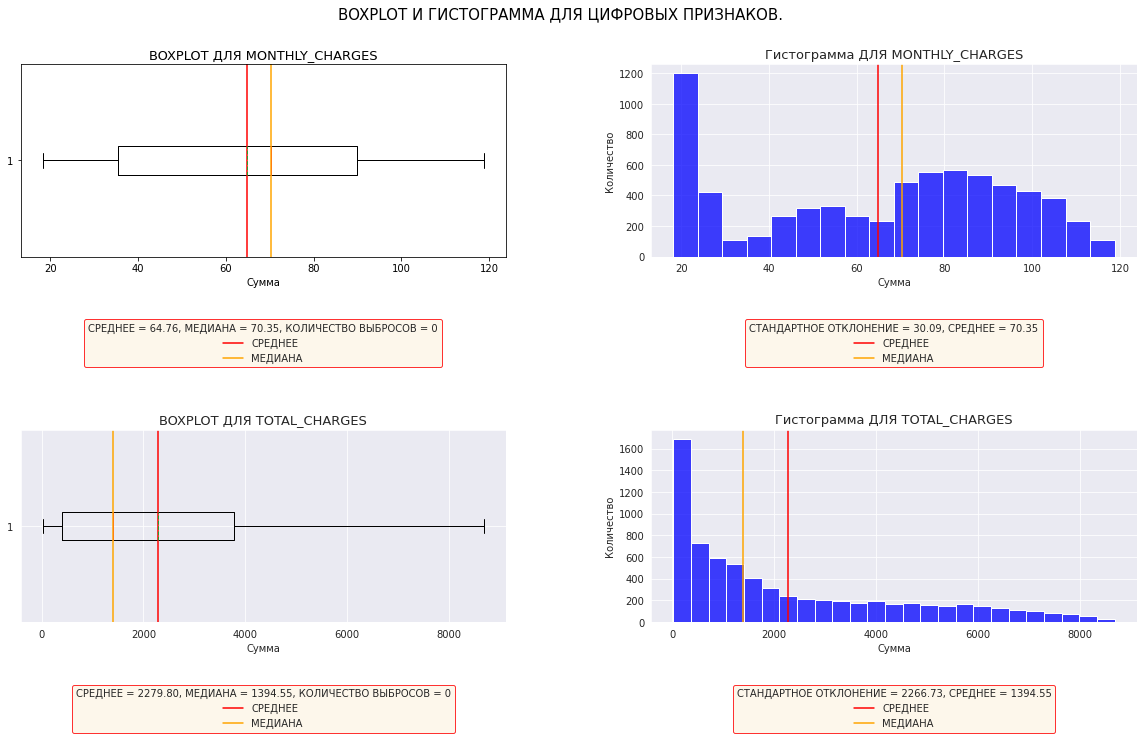

In [30]:
position = 0
plt.figure(figsize=[20, 10])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.90)
plt.suptitle('BOXPLOT И ГИСТОГРАММА ДЛЯ ЦИФРОВЫХ ПРИЗНАКОВ.', fontsize=15)

for column_name in ['monthly_charges', 'total_charges']:
    position += 1
    plt.subplot(2, 2, position)
    plt.title(f'BOXPLOT ДЛЯ {column_name.upper()}', fontsize=13)
    sns.set_style('darkgrid')
#     sns.boxplot(data=full_df[column_name], orient='h')
    boxplot = plt.boxplot(full_df[column_name].values, vert=False, meanline=True, showmeans=True)
    outliers = list(boxplot['fliers'][0].get_data()[1])
    plt.xlabel('Сумма')
    plt.axvline(np.mean(full_df[column_name]), 
               color='r', 
               linestyle='-',
               label='СРЕДНЕЕ')
    plt.axvline(np.median(full_df[column_name]), 
                color='orange', 
                linestyle='-',
                label='МЕДИАНА')
    median = np.mean(full_df[column_name])
    mean = np.median(full_df[column_name])
    plt.legend(title=f'СРЕДНЕЕ = {np.mean(full_df[column_name]):.2f}, МЕДИАНА = {np.median(full_df[column_name]):.2f}, КОЛИЧЕСТВО ВЫБРОСОВ = {len(outliers)}',
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.45))
    position += 1
    plt.subplot(2, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'Гистограмма ДЛЯ {column_name.upper()}', fontsize=13)
    sns.histplot(data=full_df[column_name], color='b', kde=False)
    plt.ylabel('Количество')
    plt.xlabel('Сумма')
    plt.axvline(np.mean(full_df[column_name]), 
                color='r', 
                linestyle='-',
                label='СРЕДНЕЕ')
    plt.axvline(np.median(full_df[column_name]), 
                color='orange', 
                linestyle='-',
                label='МЕДИАНА')
    std = full_df[column_name].std()
    plt.legend(title=f'СТАНДАРТНОЕ ОТКЛОНЕНИЕ = {std:.2f}, СРЕДНЕЕ = {mean:.2f}', 
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.45))
plt.show();

**<u>Для колонки monthly_charges:</u>**

 - **Медиана больше среднего, значит датасет имеет небольшую скошенность влево в сторону дополнительных/аномальных значений (отрицательная скошенность)**
 
 
 - **Выбросов не обнаружено**
 
 
 **<u>Для колонки total_charges:</u>**

 - **Медиана меньше среднего, значит датасет имеет скошенность вправо в сторону дополнительных/аномальных  значений (положительная скошенность скошенность)**
 
 
  - **Выбросов не обнаружено**
  
  
**Аномально высокие значения в начале гистограммы для столбца monthly_charges могут означать, что популярен какой-то начальный тариф, или на момент подключения услуги действовала бонусная/скидочная программа. А для столбца total_charges, что пользователи либо пользовались услугами недолгое время, либо ограниченным набором услуг.**

**Рассмотрим распределение количества пришедших клиентов по годам**

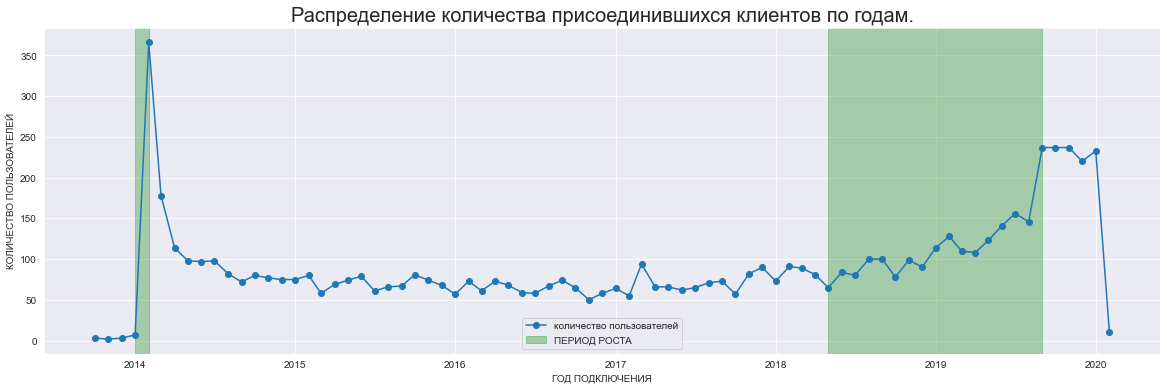

In [38]:
plt.figure(figsize=(20, 6))
plt.title('Распределение количества присоединившихся клиентов по годам.', fontsize=20)
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.xlabel('ГОД ПОДКЛЮЧЕНИЯ')
plt.plot(full_df.join(full_df.index.to_frame()).groupby('begin_date')['customer_id'].count(),
         'o-',
         label='количество пользователей',
         alpha=1)
plt.axvspan('2014-01-01', '2014-02-01', color='green', label='ПЕРИОД РОСТА', alpha=0.3)
plt.axvspan('2018-05-01', '2019-09-01', color='green', alpha=0.3)
plt.grid(True)
plt.legend();

**Активнее всего клиенты присоединялись в период с января 2014 по февраль 2014 и в период с мая 2018 по сентябрь 2019.**

**Рост количетсва клиентов в данные периоды мог быть связан с промоакцией. Так  во втором случае акция могла быть организована для привлечения новых клиентов. Резкий спад показателей в 2020 году обусловлен ограниченностью набора по временным рамкам, т.е. данные обрываются (датасет актуаден на 1 февраля 2020 года).**

**Рассмотрим распределение количества ушедших клиентов по годам**

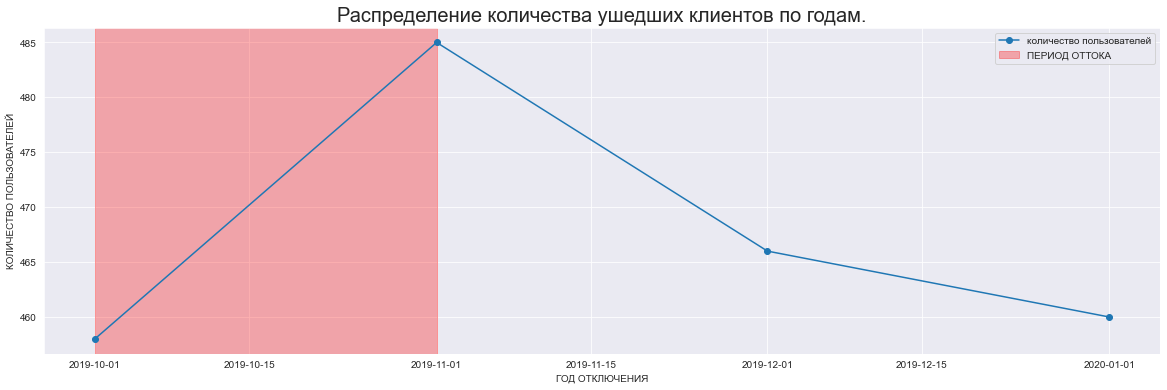

In [39]:
plt.figure(figsize=(20, 6))
plt.title('Распределение количества ушедших клиентов по годам.', fontsize=20)
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.xlabel('ГОД ОТКЛЮЧЕНИЯ')
plt.plot(full_df[full_df['end_date'] != '2020-02-01'].join(full_df.index.to_frame()).groupby('end_date')['customer_id'].count(),
         'o-',
         label='количество пользователей',
         alpha=1)
plt.axvspan('2019-10-01', '2019-11-01', color='red', label='ПЕРИОД ОТТОКА',  alpha=0.3)
plt.grid(True)
plt.legend();

**В период с октярбря 2019 года по ноябрь 2019 наблюдается рост оттока клиентов. Такое поведение клиентов может быть связано с сильной конкуренцией, и более выгодных предложений у конкуретнов ( учитывая предновогодний период), либо произиошло ухудшения качества предоставления услуг у "Ниединогразрыва.ком".**

**Посмотрим количество используемых услуг по годам**

***Добавим в набор год начала и окончания использования услуги***

In [40]:
full_df['begin_year'] = full_df['begin_date'].dt.year
full_df['end_year'] = full_df['end_date'].dt.year

In [41]:
full_df[['begin_year','end_year']].head(4)

,begin_year,end_year
customer_id,,
7590-VHVEG,2020,2020
5575-GNVDE,2017,2020
3668-QPYBK,2019,2019
7795-CFOCW,2016,2020


In [42]:
pvt_internet = full_df[full_df['internet_service'] != 'no'].groupby(('begin_year'))['internet_service'].count()
pvt_telephone = full_df[full_df['multiple_lines'] != 'no'].groupby(('begin_year'))['multiple_lines'].count()
df_with_services = pd.DataFrame({'begin_year': pvt_internet.index, 'internet': pvt_internet.values})
df_telephone = pd.DataFrame({'begin_year': pvt_telephone.index, 'telephone': pvt_telephone.values})
df_with_services = df_with_services.merge(df_telephone, on='begin_year', how='outer')
for service in (['online_security', 
                 'online_backup', 
                 'device_protection', 
                 'tech_support', 
                 'streaming_tv', 
                 'streaming_movies']):
    pvt = full_df[full_df[f'{service}'] != 'no'].groupby(('begin_year'))[f'{service}'].count()
    df_with_one_service = pd.DataFrame({'begin_year': pvt.index, f'{service}': pvt.values})
    df_with_services = df_with_services.merge(df_with_one_service, on='begin_year', how='outer')
df_with_services.index = pvt_internet.index
df_with_services.drop('begin_year', axis=1, inplace=True)

In [43]:
del pvt_internet, pvt_telephone, df_telephone

In [44]:
df_with_services.head(10)

,internet,telephone,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
begin_year,,,,,,,,
2013,8,8,5,5,7,6,7,7
2014,1083,907,708,827,813,710,782,794
2015,685,463,327,406,393,326,427,433
2016,601,352,242,307,321,242,337,339
2017,683,374,230,289,298,248,333,335
2018,790,384,228,254,268,230,344,340
2019,1537,462,256,321,310,259,462,468
2020,130,21,23,20,12,23,15,16


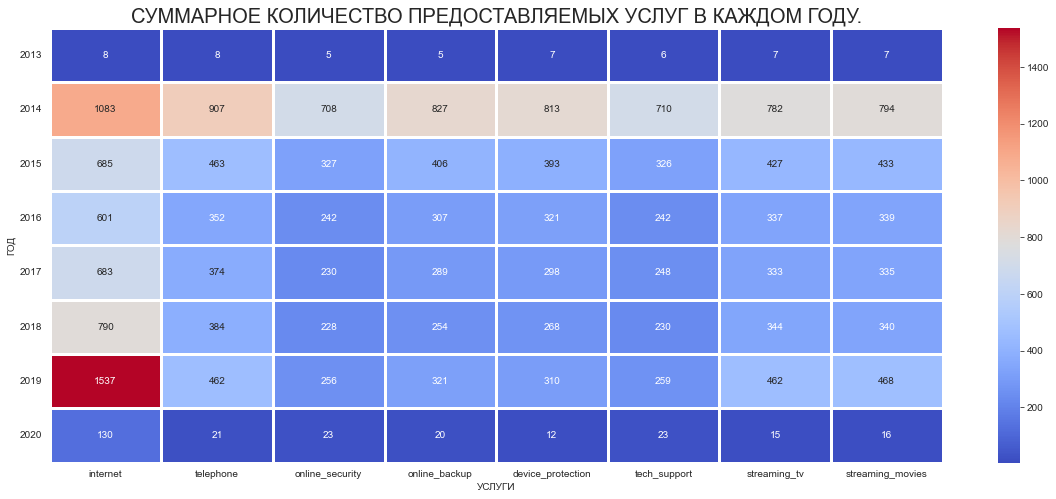

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title('СУММАРНОЕ КОЛИЧЕСТВО ПРЕДОСТАВЛЯЕМЫХ УСЛУГ В КАЖДОМ ГОДУ.', fontsize=20)
ax = sns.heatmap(df_with_services, annot=True, cmap="coolwarm", linewidths=3, fmt='.4g')
ax.set_yticklabels([i for i in df_with_services.index], rotation=0)
plt.ylabel('ГОД')
plt.xlabel('УСЛУГИ')
plt.grid(True);

**Как и на графике распределения новых клиентов наблюдается рост количества услуг в 2014 году и в период с 2018 по 2019 год.**

**Но в общей картине количество услуг, за исключением интернета значительно снизилось в период с 2014 по 2019 год.Причиной снижения может быть высокая стоимость по сравнению с конкурентами, не своевременное обновление техноллогий, и как следствие некачественная работа сервисов.**

**С 2018 по 2019 удалось увеличить количество используемых услуг. Скорее всего компания запустила промо-акцию.**

**Посмотрим, какие услуги пользовались наибольшей популярностью.**

In [46]:
total = []
for service in df_with_services.columns:
    total.append(df_with_services[service].sum())

In [47]:
df_with_total = pd.DataFrame({'services': df_with_services.columns, 'total': total})

In [48]:
del df_with_services

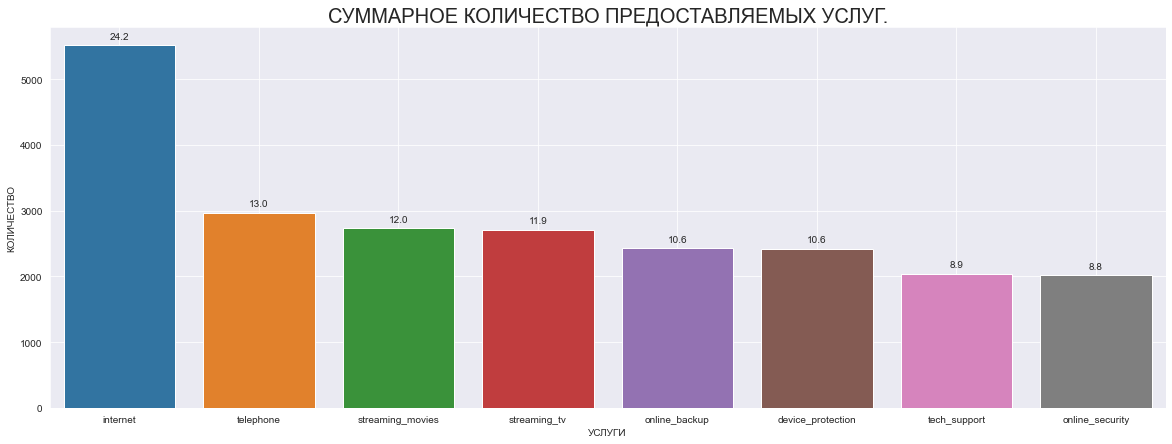

In [49]:
df_with_total.sort_values(by='total', ascending=False, inplace=True)
plt.figure(figsize=(20, 7))
plt.title('СУММАРНОЕ КОЛИЧЕСТВО ПРЕДОСТАВЛЯЕМЫХ УСЛУГ.', fontsize=20)
pop_services = sns.barplot(x='services', y='total', data=df_with_total)
for p in pop_services.patches:
    pop_services.annotate(format(p.get_height() / df_with_total['total'].sum() * 100, '.1f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
plt.ylabel('КОЛИЧЕСТВО')
plt.xlabel('УСЛУГИ')
plt.grid(True);

**Самые популярные услуги:**

1. **Интернет**


2. **Телефония**


3. **Стриминговое кино**


4. **Стриминговое ТВ**

In [50]:
del df_with_total

**Посмотрим какие типы подключения интернета пользуются большим успехом.**

In [51]:
pvt_dsl = full_df[full_df['internet_service'] == 'dsl'].groupby(('begin_year'))['internet_service'].count()
pvt_optic = full_df[full_df['internet_service'] == 'fiber optic'].groupby(('begin_year'))['internet_service'].count()
df_with_connection_type = pd.DataFrame({'begin_year': pvt_dsl.index, 'dsl': pvt_dsl.values})
df_optic = pd.DataFrame({'begin_year': pvt_optic.index, 'optic': pvt_optic.values})
df_with_connection_type = df_with_connection_type.merge(df_optic, on='begin_year', how='outer')
df_with_connection_type.index = pvt_dsl.index
df_with_connection_type.drop('begin_year', axis=1, inplace=True)

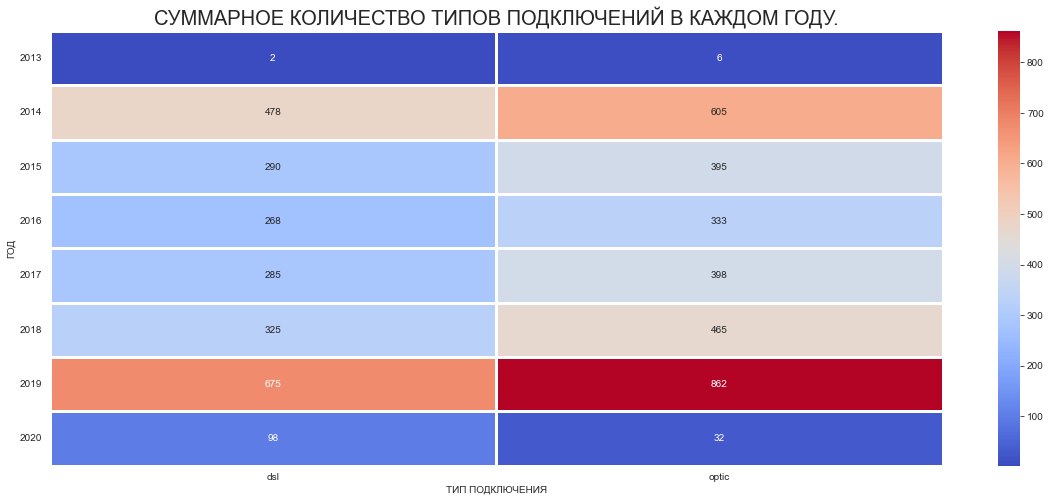

In [52]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title('СУММАРНОЕ КОЛИЧЕСТВО ТИПОВ ПОДКЛЮЧЕНИЙ В КАЖДОМ ГОДУ.', fontsize=20)
ax = sns.heatmap(df_with_connection_type, annot=True, cmap="coolwarm", linewidths=3, fmt='.4g')
ax.set_yticklabels([i for i in df_with_connection_type.index], rotation=0)
plt.ylabel('ГОД')
plt.xlabel('ТИП ПОДКЛЮЧЕНИЯ')
plt.grid(True);

**Интернет для людей важен, количество подключений растет, не смотря на значительный отток клиентов с 2014 по 2015 год. Наиболее предпочтительным подключением является оптика, качество сигнала и скорость там лучше.**

In [53]:
del ax, pvt_dsl, pvt_optic, df_optic, df_with_connection_type

**Рассмотрим подробнее как влияет возраст и наличие партнера, детей на выбираемые услуги.**

In [54]:
def get_interest(param, params_value):
    total = []
    pvt_internet = full_df[(full_df['internet_service'] != 'no') & (full_df[param] == params_value)].groupby(('begin_year'))['internet_service'].count()
    pvt_telephone = full_df[(full_df['multiple_lines'] != 'no') & (full_df[param] == params_value)].groupby(('begin_year'))['multiple_lines'].count()
    df_with_services = pd.DataFrame({'begin_year': pvt_internet.index, 'internet': pvt_internet.values})
    df_telephone = pd.DataFrame({'begin_year': pvt_telephone.index, 'telephone': pvt_telephone.values})
    df_with_services = df_with_services.merge(df_telephone, on='begin_year', how='outer')
    for service in (['online_security', 
                     'online_backup', 
                     'device_protection', 
                     'tech_support', 
                     'streaming_tv', 
                     'streaming_movies']):
        pvt = full_df[(full_df[f'{service}'] != 'no') & (full_df[param] == params_value)].groupby(('begin_year'))[f'{service}'].count()
        df_with_one_service = pd.DataFrame({'begin_year': pvt.index, f'{service}': pvt.values})
        df_with_services = df_with_services.merge(df_with_one_service, on='begin_year', how='outer')
    df_with_services.index = pvt_internet.index
    df_with_services.drop('begin_year', axis=1, inplace=True)
    
    for service in df_with_services.columns:
        total.append(df_with_services[service].sum())
    df_with_total = pd.DataFrame({'services': df_with_services.columns, 'total': total})
    return df_with_total

In [55]:
def get_text(param, params_value):
    text = None
    if (param == 'partner') and (params_value == 'yes'):
        text = 'В БРАКЕ'
    elif (param == 'partner') and (params_value == 'no'):
        text = 'НЕ В БРАКЕ'
    elif (param == 'senior_citizen') and (params_value == 'yes'):
        text = 'В ПОЖИЛОМ ВОЗРАСТЕ'
    elif (param == 'senior_citizen') and (params_value == 'yes'):
        text = 'В ПОЖИЛОМ ВОЗРАСТЕ'
    elif (param == 'senior_citizen') and (params_value == 'no'):
        text = 'НЕ В ПОЖИЛОМ ВОЗРАСТЕ'
    elif (param == 'dependents') and (params_value == 'yes'):
        text = 'С ДЕТЬМИ'
    elif (param == 'dependents') and (params_value == 'no'):
        text = 'БЕЗ ДЕТЕЙ'
    return text

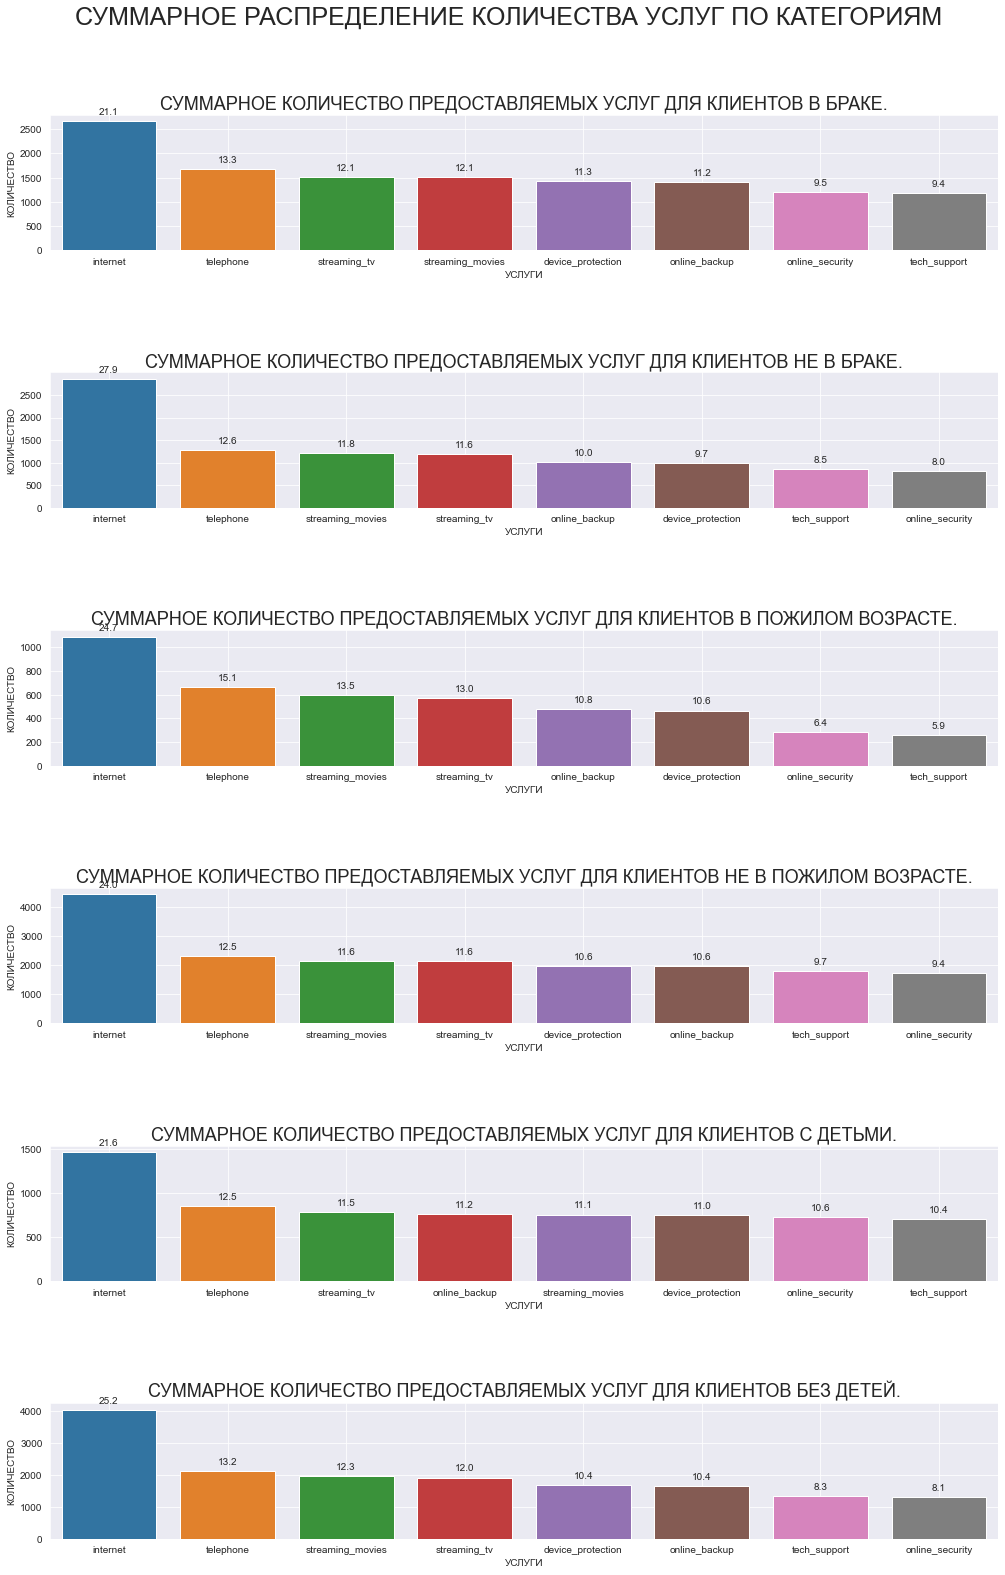

In [56]:
position = 0
plt.figure(figsize=[17, 50])
plt.subplots_adjust(top=0.95, wspace=0.10, hspace=0.90)
plt.suptitle('СУММАРНОЕ РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА УСЛУГ ПО КАТЕГОРИЯМ', fontsize=25)
for key, value in ({'partner': ['yes', 'no'],
                    'senior_citizen': ['yes', 'no'],
                    'dependents': ['yes', 'no']}.items()):
    for v in value:
        df_with_total_for_param = get_interest(key, v)
        text = get_text(key, v)
        position += 1
        plt.subplot(12, 1, position)
        df_with_total_for_param.sort_values(by='total', ascending=False, inplace=True)
        plt.title(f'СУММАРНОЕ КОЛИЧЕСТВО ПРЕДОСТАВЛЯЕМЫХ УСЛУГ ДЛЯ КЛИЕНТОВ {text}.', fontsize=18)
        pop_services = sns.barplot(x='services', y='total', data=df_with_total_for_param)
        for p in pop_services.patches:
            pop_services.annotate(format(p.get_height() / df_with_total_for_param['total'].sum() * 100, '.1f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 9), 
                                  textcoords = 'offset points')
            plt.ylabel('КОЛИЧЕСТВО')
            plt.xlabel('УСЛУГИ')
            plt.grid(True);

**Независимо от возраста и семейного положения интернет и телефон важен для всех.**

**Онлайн-кинотеатр и онлайн-телевидение предпочитают клиенты без детей, а клиенты с детьми предпочли в дополнение иметь место для резервного копирования ( могу предположить, что это для семейных и детских фотографий)**

**Посмотрим, какой тип оплаты клиенты предпочитают больше.**

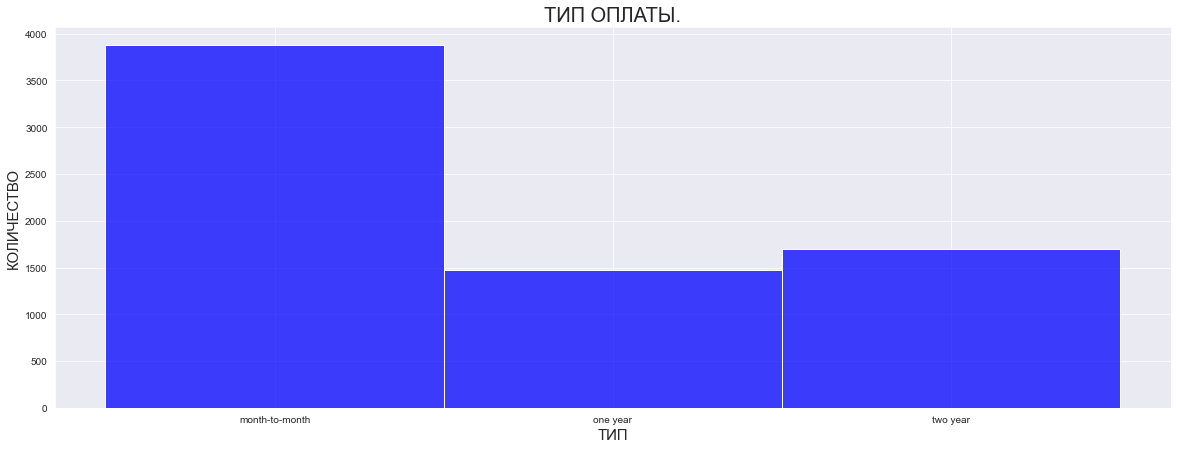

In [57]:
plt.figure(figsize=(20, 7))
plt.title('ТИП ОПЛАТЫ.', fontsize=20)
sns.histplot(full_df['type'], color='b', kde=False);
plt.ylabel('КОЛИЧЕСТВО', fontsize=15)
plt.xlabel('ТИП', fontsize=15)
plt.grid(True);

**Клиенты предпочитают ежемесячный тип оплаты.**

**И каким образом**

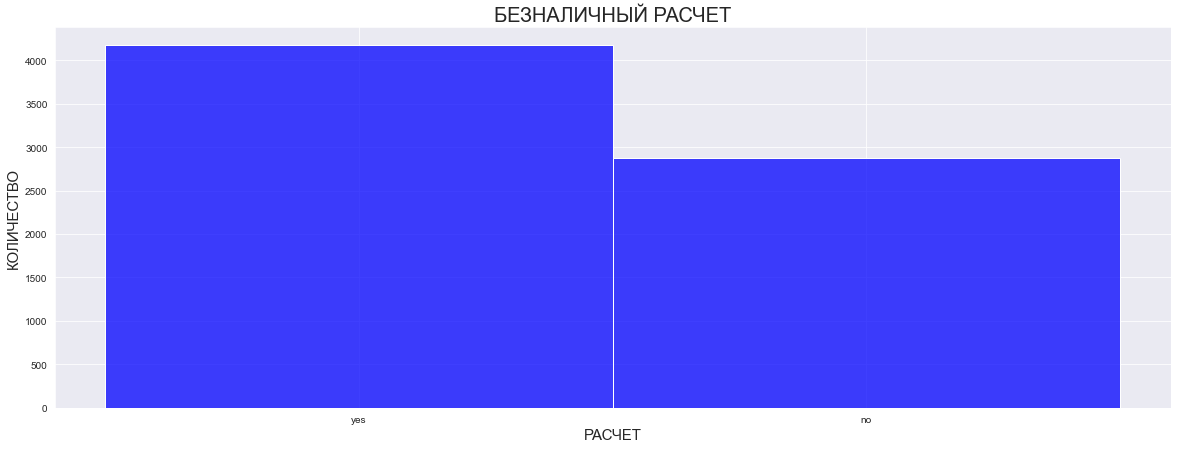

In [58]:
plt.figure(figsize=(20, 7))
plt.title('БЕЗНАЛИЧНЫЙ РАСЧЕТ', fontsize=20)
sns.histplot(full_df['paperless_billing'], color='b', kde=False);
plt.ylabel('КОЛИЧЕСТВО', fontsize=15)
plt.xlabel('РАСЧЕТ', fontsize=15)
plt.grid(True);

**Безналичный расчет несомненно удобнее, его выбирает большинство.**

### Подготовка данных

**Принял решение заменить булевые значения yes/no на 1/0 для удобства.**

In [59]:
for column in ['paperless_billing',
               'multiple_lines',
               'senior_citizen',
               'dependents',
               'online_security',
               'online_backup',
               'tech_support',
               'streaming_tv',
               'streaming_movies',
               'partner',
               'device_protection']:
    full_df[column].replace('yes', 1, inplace=True)
    full_df[column].replace('no', 0, inplace=True)

**Добавим целевой признак в датасет**

In [60]:
full_df['churn'] = 1
full_df.loc[full_df['end_date'] == '2020-02-01', 'churn'] = 0

**Дату начало и окончания контракта необходимым удалить, так же как и end_year, begin_year. Вместо них добави столбец с длительностью контракта.**

In [61]:
full_df['contracts_duration'] = (full_df['end_date'] - full_df['begin_date']).dt.days

In [62]:
full_df.drop(['begin_date', 'end_date', 'begin_year', 'end_year'], axis=1, inplace=True)

**Уберем из индексов customer_id**

In [63]:
full_df.reset_index(inplace=True)

In [64]:
full_df.drop(['customer_id'], axis=1, inplace=True)

**Закодируем строковые признаки с помощью техники прямого кодирования. Чтобы не угодить в ловушку фиктивных признаков добавим аргумент drop_first = True.**

In [65]:
full_df = pd.get_dummies(full_df, columns = ['gender', 'payment_method', 'type', 'internet_service'], drop_first = True)

**Посмотрим на баланс классов в целевом признаке.**

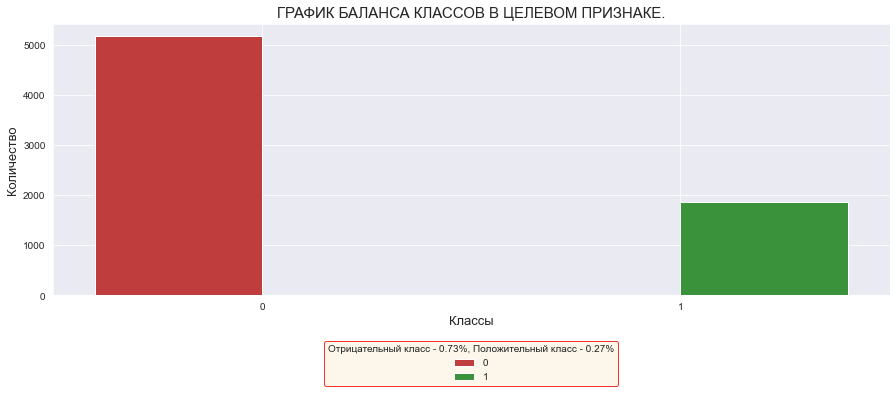

In [66]:
plt.figure(figsize=[15, 5])
plt.title('ГРАФИК БАЛАНСА КЛАССОВ В ЦЕЛЕВОМ ПРИЗНАКЕ.', fontsize=15)
palette = {0: 'tab:red', 1: 'tab:green'}
sns.set_style('darkgrid')
sns.barplot(x=full_df['churn'].value_counts().index,
            y=full_df['churn'].value_counts(),
            hue=full_df['churn'].value_counts().index,
           palette=palette)
plt.ylabel('Количество', fontsize=13)
plt.xlabel('Классы', fontsize=13)
plt.grid(True)
negative_class = full_df['churn'].value_counts(normalize=True)[0]
positive_class = full_df['churn'].value_counts(normalize=True)[1]
plt.legend(title=f'Отрицательный класс - {negative_class:.2f}%, Положительный класс - {positive_class:.2f}%', 
           loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.25))
plt.show();

**Наблюдается дисбаланс классов.**

**Построим матрицу корреляции.**

In [67]:
cor = full_df.corr()

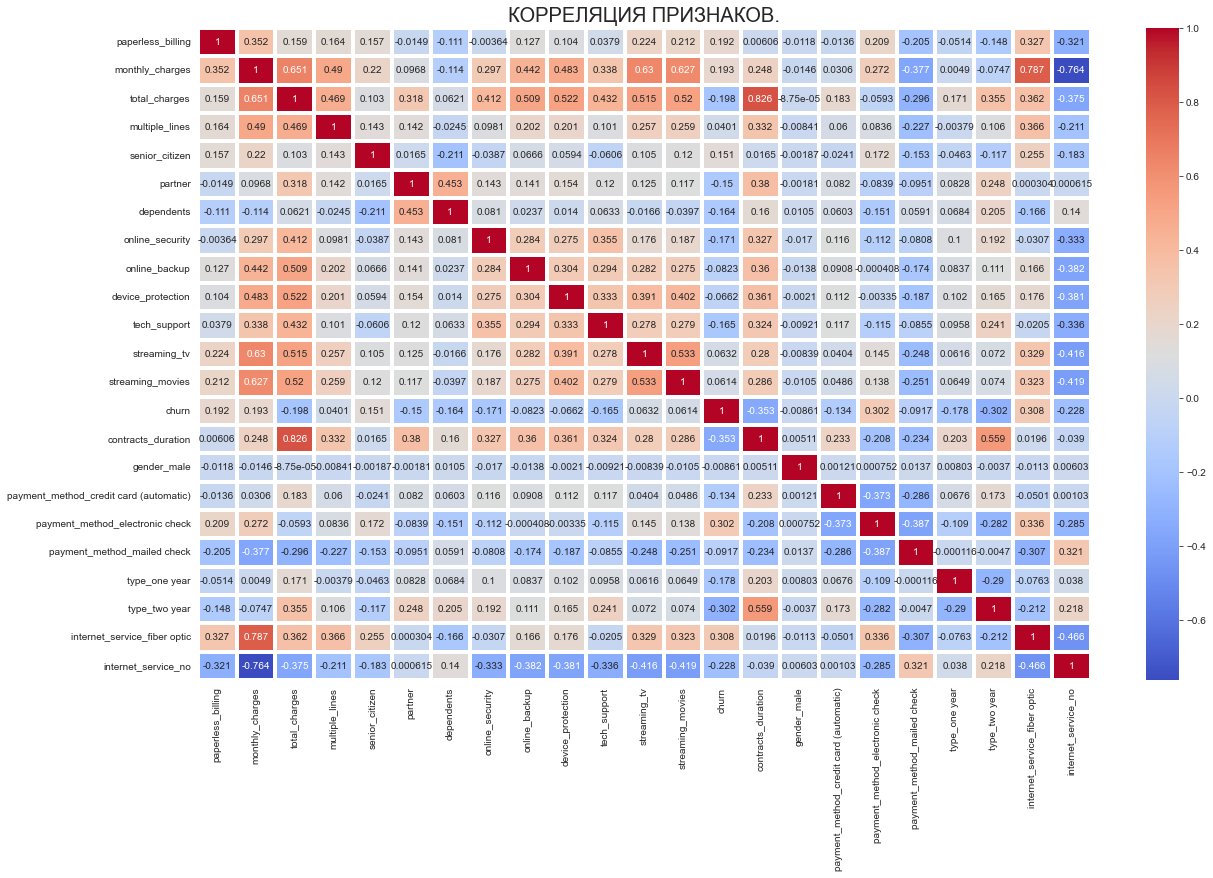

In [68]:
fig, ax = plt.subplots(figsize=(20,12))
plt.title('КОРРЕЛЯЦИЯ ПРИЗНАКОВ.', fontsize=20)
sns.heatmap(cor, annot=True, cmap="coolwarm",  fmt='.3g', linewidth=4)
plt.grid(True);

**Наибольшая корреляция между длительностью контракта и общей суммы оплаты, total_charges уберем.**

In [69]:
full_df.drop(['total_charges'], axis=1, inplace=True)

### Отчет

 - **Лишние признаки удалены.**
 
 
 - **Добавлен целевой и дополнительный (contracts_duration) признаки.**


 - **Строковые признаки закодированы с помощью техники прямого кодирования.**
 
 
 - **В целевом признаке наблюдается дисбаланс классов. Учтем это при проектировании моделей, применив метод взвешивания классов.**

### Подготовка прототипа решения

**Сформируем тренировочную и тестовую выборки**

In [70]:
features = full_df.drop(['churn'], axis=1)
target = full_df['churn']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [72]:
del features, target, full_df

In [73]:
print('\nРАЗМЕР ВЫБОРОК')
print(f'\nТРЕНИРОВОЧНАЯ: FEATURES - {len(x_train)}, TARGET - {len(y_train)}')
print(f'\nТЕСТОВАЯ: FEATURES - {len(x_test)}, TARGET - {len(y_test)}')


РАЗМЕР ВЫБОРОК

ТРЕНИРОВОЧНАЯ: FEATURES - 5282, TARGET - 5282

ТЕСТОВАЯ: FEATURES - 1761, TARGET - 1761


**Обучим модели**

In [74]:
state = RandomState(12345)
dct_with_models_param = {}

#### Модель LogisticRegression

In [75]:
%%time
start_time = time.time()
model_lr_for_search = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
params = dict(C=np.arange(1, 20, 1))
search_for_lr = RandomizedSearchCV(model_lr_for_search, 
                                   params,
                                   scoring='roc_auc',
                                   random_state=state)
search_for_lr.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['LR'] = search_for_lr.best_params_
dct_with_models_param['LR'].update(train_roc_auc=search_for_lr.best_score_, search_time=search_time)

CPU times: user 4.61 s, sys: 62 ms, total: 4.68 s
Wall time: 1.2 s


In [76]:
del model_lr_for_search, search_for_lr

In [77]:
%%time
start_time = time.time()
test_model_lr = LogisticRegression(solver='liblinear',
                                   C=dct_with_models_param['LR']['C'],
                                   class_weight='balanced',
                                   random_state=state,
                                   max_iter=1000)
test_model_lr.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['LR'].update(train_time=train_time)

CPU times: user 104 ms, sys: 2.72 ms, total: 107 ms
Wall time: 27.4 ms


#### Модель DecisionTreeClassifier

In [78]:
%%time
start_time = time.time()
model_dtc_for_search = DecisionTreeClassifier(class_weight='balanced')
params = dict(max_depth=np.arange(10, 100, 10),
              splitter=['best', 'random'],
              min_samples_leaf=[1, 3])
search_for_dtc = RandomizedSearchCV(model_dtc_for_search, 
                                   params,
                                   scoring='roc_auc',
                                   random_state=state)
search_for_dtc.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['DTC'] = search_for_dtc.best_params_
dct_with_models_param['DTC'].update(train_roc_auc=search_for_dtc.best_score_, search_time=search_time)

CPU times: user 1.15 s, sys: 27.6 ms, total: 1.18 s
Wall time: 802 ms


In [79]:
del model_dtc_for_search, search_for_dtc

In [80]:
%%time
start_time = time.time()
test_model_dtc = DecisionTreeClassifier(max_depth=dct_with_models_param['DTC']['max_depth'], 
                                       splitter=dct_with_models_param['DTC']['splitter'],
                                       min_samples_leaf=dct_with_models_param['DTC']['min_samples_leaf'],
                                       class_weight='balanced',
                                       random_state=state)
test_model_dtc.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['DTC'].update(train_time=train_time)

CPU times: user 15.8 ms, sys: 1.11 ms, total: 16.9 ms
Wall time: 15.9 ms


#### Модель LinearSVC

In [81]:
%%time
start_time = time.time()
model_lsvc_for_search = LinearSVC(random_state=state, class_weight='balanced')
params = dict(C=np.arange(0.1, 1, 0.1))
search_for_lsvc = RandomizedSearchCV(model_lsvc_for_search, 
                                   params,
                                   scoring='roc_auc',
                                   random_state=state)
search_for_lsvc.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['LinearSVC'] = search_for_lsvc.best_params_
dct_with_models_param['LinearSVC'].update(train_roc_auc=search_for_lsvc.best_score_, search_time=search_time)

CPU times: user 37.1 s, sys: 318 ms, total: 37.5 s
Wall time: 10.8 s


In [82]:
del model_lsvc_for_search, search_for_lsvc

In [83]:
start_time = time.time()
test_model_lsvc = LinearSVC(C=dct_with_models_param['LinearSVC']['C'], 
                          class_weight='balanced',
                          random_state=state)
test_model_lsvc.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['LinearSVC'].update(train_time=train_time)

#### Модель MultinomialNB

In [84]:
%%time
start_time = time.time()
model_mnb_for_search = MultinomialNB()
params = dict(alpha=[0,1], fit_prior=[True, False])
search_for_mnb = RandomizedSearchCV(model_mnb_for_search,
                                    params,
                                    scoring='roc_auc')
search_for_mnb.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['MNB'] = search_for_mnb.best_params_
dct_with_models_param['MNB'].update(train_roc_auc=search_for_mnb.best_score_, search_time=search_time)

CPU times: user 489 ms, sys: 7.48 ms, total: 497 ms
Wall time: 130 ms


In [85]:
del model_mnb_for_search, search_for_mnb

In [86]:
%%time
start_time = time.time()
test_model_mnb = MultinomialNB(alpha=dct_with_models_param['MNB']['alpha'], 
                          fit_prior=dct_with_models_param['MNB']['fit_prior'])
test_model_mnb.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['MNB'].update(train_time=train_time)

CPU times: user 15.1 ms, sys: 1.77 ms, total: 16.8 ms
Wall time: 3.98 ms


#### Модель KNeighborsClassifier

In [87]:
%%time
start_time = time.time()
model_knb_for_search = KNeighborsClassifier()
params = dict(weights=['uniform', 'distance'],
              p=[1,2],
              leaf_size=np.arange(10,40,1),
              metric=['minkowski', 'chebyshev'],
              n_neighbors=np.arange(5, 40, 10))
search_for_knb = RandomizedSearchCV(model_knb_for_search,
                                    params,
                                    scoring='roc_auc')
search_for_knb.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['KNB'] = search_for_knb.best_params_
dct_with_models_param['KNB'].update(train_roc_auc=search_for_knb.best_score_, search_time=search_time)

CPU times: user 7.59 s, sys: 475 ms, total: 8.06 s
Wall time: 4.94 s


In [88]:
del model_knb_for_search, search_for_knb

In [89]:
%%time
start_time = time.time()
test_model_knb = KNeighborsClassifier(weights=dct_with_models_param['KNB']['weights'],
                                      p=dct_with_models_param['KNB']['p'],
                                      n_neighbors=dct_with_models_param['KNB']['n_neighbors'],
                                      leaf_size=dct_with_models_param['KNB']['leaf_size'],
                                      metric=dct_with_models_param['KNB']['metric'])
test_model_knb.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['KNB'].update(train_time=train_time)

CPU times: user 10.5 ms, sys: 1.17 ms, total: 11.7 ms
Wall time: 2.76 ms


#### Модель RandomForestClassifier

In [90]:
%%time
start_time = time.time()
model_rf_for_search = RandomForestClassifier(class_weight='balanced')

params = dict(n_estimators=np.arange(100, 1000, 100),
              max_depth=np.arange(5,11,1),
              n_jobs=[1,-1])

search_for_rf = RandomizedSearchCV(model_rf_for_search, 
                                   params,
                                   scoring='roc_auc',
                                   random_state=state)
search_for_rf.fit(x_train, y_train)
end_time = time.time()
search_time = (end_time - start_time) / 60
dct_with_models_param['RF'] = search_for_rf.best_params_
dct_with_models_param['RF'].update(train_roc_auc=search_for_rf.best_score_, search_time=search_time)

CPU times: user 29.7 s, sys: 3.28 s, total: 32.9 s
Wall time: 34.7 s


In [91]:
del model_rf_for_search, search_for_rf

In [92]:
%%time
start_time = time.time()
test_model_rf = RandomForestClassifier(max_depth=dct_with_models_param['RF']['max_depth'], 
                                       n_estimators=dct_with_models_param['RF']['n_estimators'],
                                       n_jobs=dct_with_models_param['RF']['n_jobs'],
                                       class_weight='balanced',
                                       random_state=state)
test_model_rf.fit(x_train, y_train)
end_time = time.time()
train_time = (end_time - start_time) / 60
dct_with_models_param['RF'].update(train_time=train_time)

CPU times: user 2.71 s, sys: 429 ms, total: 3.14 s
Wall time: 1.23 s


#### Модель CatBoostClassifier

In [93]:
%%time
start_time = time.time()
train_pool = Pool(x_train, y_train)
cat_for_search = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='AUC:hints=skip_train~false',
                                    auto_class_weights='Balanced',
                                    verbose=False)
params = {"depth": [5,10], 'learning_rate': [0.1, 1, 0.01]}
grid_search_results = cat_for_search.grid_search(params, train_pool, cv=3, verbose=False,  plot=False)
end_time = time.time()
search_time = (end_time - start_time) / 60


bestTest = 0.9217430104
bestIteration = 990


bestTest = 0.8913269978
bestIteration = 46


bestTest = 0.8665877065
bestIteration = 982


bestTest = 0.8845896875
bestIteration = 572


bestTest = 0.8463991366
bestIteration = 644


bestTest = 0.8604671264
bestIteration = 996

CPU times: user 3min 39s, sys: 48.8 s, total: 4min 28s
Wall time: 1min 4s


In [94]:
dct_with_models_param['CBC'] = grid_search_results['params']
dct_with_models_param['CBC'].update(search_time=search_time)

In [95]:
del cat_for_search, grid_search_results

In [96]:
%%time
test_cat = CatBoostClassifier(depth=dct_with_models_param['CBC']['depth'],
                              learning_rate=dct_with_models_param['CBC']['learning_rate'],
                              loss_function='Logloss',
                              eval_metric='AUC:hints=skip_train~false',
                              auto_class_weights='Balanced',
                              verbose=False)
start_time = time.time()                              
test_cat.fit(train_pool)
end_time = time.time()
train_time = (end_time - start_time) / 60

CPU times: user 10.6 s, sys: 600 ms, total: 11.2 s
Wall time: 3.07 s


In [97]:
dct_with_models_param['CBC'].update(train_roc_auc=test_cat.get_best_score()['learn']['AUC'], train_time=train_time)

#### Модель LightGMBClassifier

In [98]:
%%time
lgb_model = lgb.LGBMClassifier(class_weight='balanced')
lgb_train = lgb.Dataset(x_train,
                        y_train,
                        free_raw_data=False)
lgb_test = lgb.Dataset(x_test,
                       y_test,
                       free_raw_data=False)
start_time = time.time()

distributions = {'max_depth': [5,10,15,20], 'learning_rate': [0.1, 0.2], 'n_jobs': [1,-1]}
lgb_search = RandomizedSearchCV(lgb_model, distributions, scoring='roc_auc',  random_state=state)
lgb_search.fit(x_train, y_train)

train_roc_auc = lgb_search.best_score_
end_time = time.time()
search_time = (end_time - start_time) / 60

CPU times: user 14.9 s, sys: 169 ms, total: 15.1 s
Wall time: 4.8 s


In [99]:
dct_with_models_param['LGB'] = lgb_search.best_params_
dct_with_models_param['LGB'].update(search_time=search_time, train_roc_auc=train_roc_auc)

In [100]:
%%time
param = {}
star_time = time.time()
test_model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', 
                                    metric='auc',
                                    max_depth=dct_with_models_param['LGB']['max_depth'],
                                    random_state=state,
                                    learning_rate=dct_with_models_param['LGB']['learning_rate'],
                                    n_jobs=dct_with_models_param['LGB']['n_jobs'],
                                    class_weight='balanced',
                                    num_boost_round=1000)
test_model_lgb.fit(x_train, y_train,
                  eval_set=[(x_train,y_train), (x_test,y_test)],
                  eval_metric='auc')
end_time = time.time()
train_time = (end_time - start_time) / 60

[1]	training's auc: 0.871549	valid_1's auc: 0.850814
[2]	training's auc: 0.878545	valid_1's auc: 0.856947
[3]	training's auc: 0.883407	valid_1's auc: 0.858395
[4]	training's auc: 0.886067	valid_1's auc: 0.86135
[5]	training's auc: 0.891173	valid_1's auc: 0.865058
[6]	training's auc: 0.89496	valid_1's auc: 0.866448
[7]	training's auc: 0.899804	valid_1's auc: 0.870871
[8]	training's auc: 0.902564	valid_1's auc: 0.872554
[9]	training's auc: 0.905608	valid_1's auc: 0.874758
[10]	training's auc: 0.908164	valid_1's auc: 0.875115
[11]	training's auc: 0.910056	valid_1's auc: 0.873508
[12]	training's auc: 0.913049	valid_1's auc: 0.874773
[13]	training's auc: 0.915806	valid_1's auc: 0.874677
[14]	training's auc: 0.918201	valid_1's auc: 0.873791
[15]	training's auc: 0.920011	valid_1's auc: 0.87274
[16]	training's auc: 0.92349	valid_1's auc: 0.876163
[17]	training's auc: 0.92484	valid_1's auc: 0.874987
[18]	training's auc: 0.926884	valid_1's auc: 0.875247
[19]	training's auc: 0.929859	valid_1's au

In [101]:
dct_with_models_param['LGB'].update(train_time=train_time)

### Проверка моделей (Тестирование)

**С помощью перебора порога классификации попробуем улучшить метрику моделей.**

In [102]:
def get_best_threshold(probabilities_one_test):

    best_f1 = 0
    best_treshold = 0

    for threshold in np.arange(0.1, 0.9, 0.1):
        predicted_valid = probabilities_one_test > threshold
        f1 = f1_score(y_test, predicted_valid)
        if (f1 > best_f1):
            best_f1 = f1
            best_threshold = threshold
            if (best_threshold >= 0.1 ):
                min_boundary = (best_threshold - 0.05)
                max_boundary = (best_threshold + 0.05)
                for updated_threshold in np.arange(min_boundary, max_boundary, 0.01):
                    predicted_valid = probabilities_one_test > updated_threshold
                    f1 = f1_score(y_test, predicted_valid)
                    if (f1 > best_f1):
                        best_f1 = f1
                        best_threshold = updated_threshold
                        
    return [best_f1, best_threshold]

In [103]:
def draw_graph_roc_curve(lst_with_old_f1_and_threshold, probabilities_one_test, model_name):
    
    def find_nearest_num(ar_for_search, val):
        idx = np.abs(ar_for_search - val).argmin()
        return ar_for_search.flat[idx]

    model_name = model_name
    max_val_tpr = 0
    min_val_fpr = 0
    best_f1 = lst_with_old_f1_and_threshold[2]
    best_threshold = lst_with_old_f1_and_threshold[1]
    old_f1 = lst_with_old_f1_and_threshold[0]
    auc_roc = roc_auc_score(y_test, probabilities_one_test)
    fpr, tpr, all_thresholds = roc_curve(y_test, probabilities_one_test)
    nearest_num = find_nearest_num(all_thresholds, best_threshold)
    a = np.where(all_thresholds == nearest_num)
    index = int(a[0])
    max_val_tpr = list(tpr)[index]
    min_val_fpr = list(fpr)[index]
    plt.figure(figsize=[15, 12])
    sns.set_style('darkgrid')
    plt.plot([0,1],[0,1], linestyle ='--', label='Константная модель')
    plt.text((min_val_fpr + 0.02),(max_val_tpr + 0.02), 
             f'THRESHOLD - {best_threshold:.2f}, FPR - {min_val_fpr:.2f}, TPR - {max_val_tpr:.2f}',
             color='r',
             fontsize=16)
    plt.plot(fpr,tpr, color='b', label='ROC-кривая')
    plt.plot([min_val_fpr],[max_val_tpr], 
             'o',
             color='r',
             label=f'Порог классификации - {best_threshold}', markersize=15)
    plt.axvline(x=min_val_fpr, color='r', linestyle='--')
    plt.axhline(y=max_val_tpr, color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR', fontsize=15)
    plt.ylabel('TPR', fontsize=15)
    plt.figtext((min_val_fpr + 0.2), (max_val_tpr - 0.10), f'OLD_F1={old_f1:.2f}, NEW_F1={best_f1:.2f}, AUC_ROC={auc_roc:.2f}', fontsize=17)
    plt.title(f'ROC-Кривая для {model_name}', fontsize=17)
    plt.grid(True)
    plt.legend(edgecolor = 'r', facecolor = 'oldlace')
    plt.show();
    return auc_roc

#### Модель LightGMBClassifier

In [104]:
start_time = time.time()
probalities_test_lgb = test_model_lgb.predict_proba(x_test)
probabilities_one_test_lgb = probalities_test_lgb[:,1]
best_test_f1, best_threshold_lgb = get_best_threshold(probabilities_one_test_lgb)
end_time = time.time()
test_time = (end_time - start_time) / 60

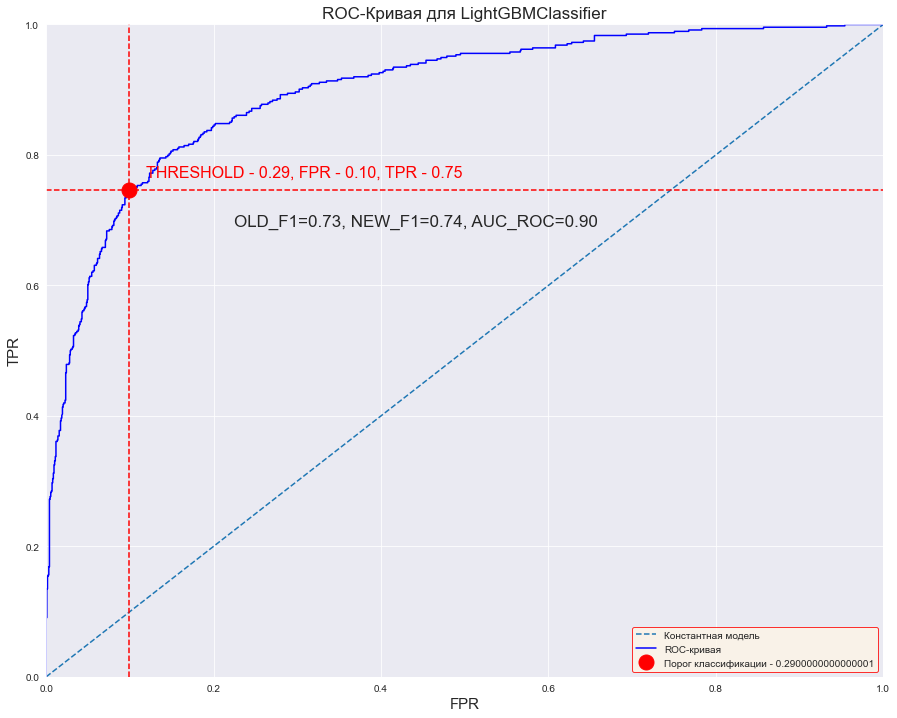

In [105]:
old_f1_test_lgb = f1_score(y_test, test_model_lgb.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_lgb, best_threshold_lgb, best_test_f1], probabilities_one_test_lgb, 'LightGBMClassifier')

In [106]:
dct_with_models_param['LGB'].update(best_threshold=best_threshold_lgb, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель CatBoostClassifier

In [107]:
start_time = time.time()
probalities_test_cbc = test_cat.predict_proba(x_test)
probabilities_one_test_cbc = probalities_test_cbc[:,1]
best_test_f1, best_threshold_cbc = get_best_threshold(probabilities_one_test_cbc)
end_time = time.time()
test_time = (end_time - start_time) / 60

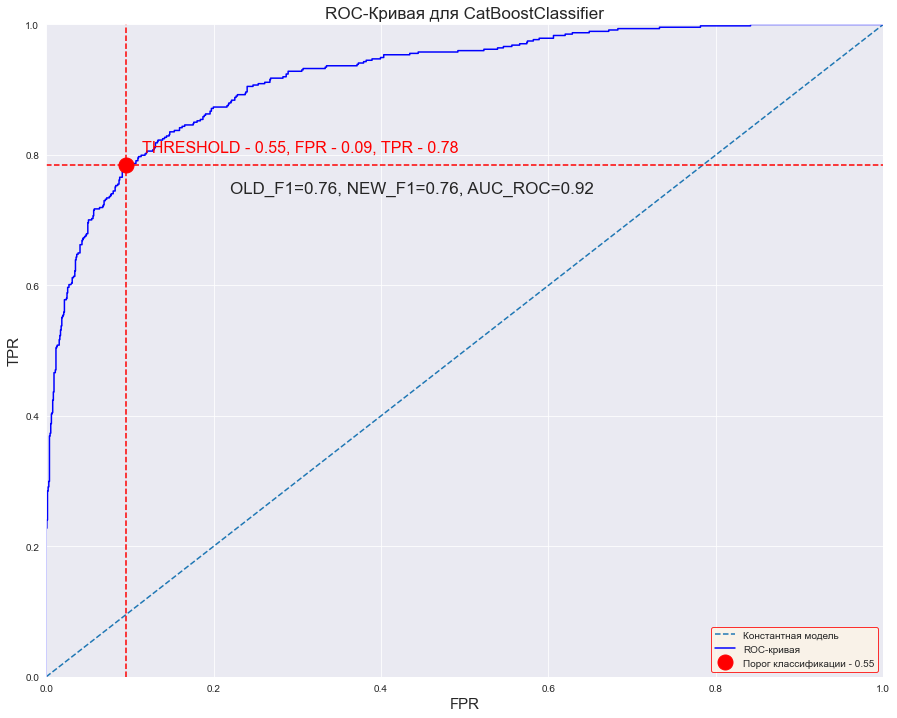

In [108]:
old_f1_test_cbc = f1_score(y_test, test_cat.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_cbc, best_threshold_cbc, best_test_f1], probabilities_one_test_cbc, 'CatBoostClassifier')

In [109]:
dct_with_models_param['CBC'].update(best_threshold=best_threshold_cbc, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель RandomForestClassifier

In [110]:
start_time = time.time()
probalities_test_rf = test_model_rf.predict_proba(x_test)
probabilities_one_test_rf = probalities_test_rf[:,1]
best_test_f1, best_threshold_rf = get_best_threshold(probabilities_one_test_rf)
end_time = time.time()
test_time = (end_time - start_time) / 60

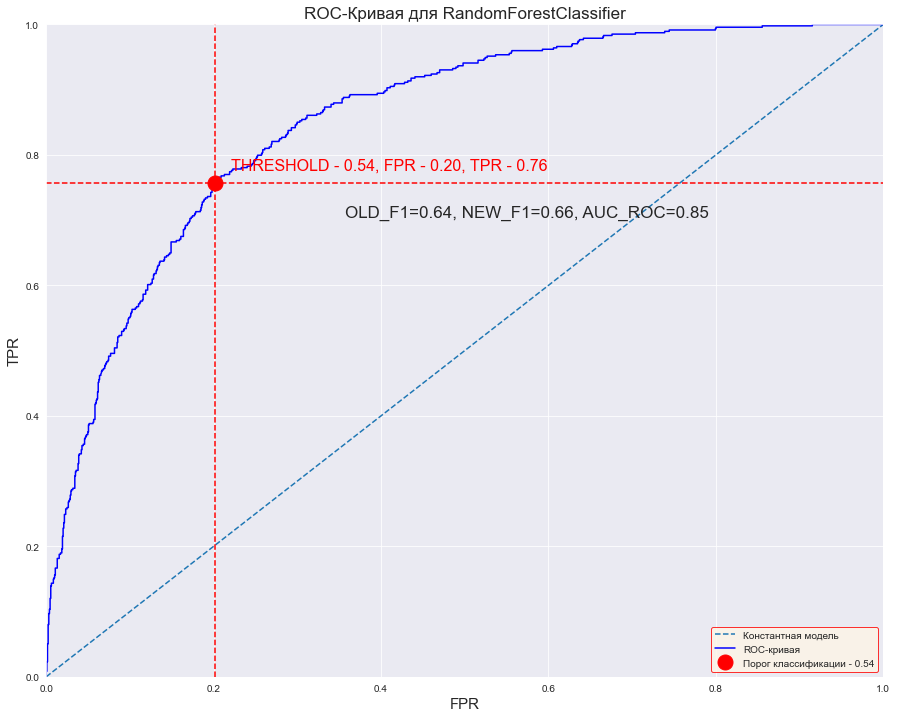

In [111]:
old_f1_test_rf = f1_score(y_test, test_model_rf.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_rf, best_threshold_rf, best_test_f1], probabilities_one_test_rf, 'RandomForestClassifier')

In [112]:
dct_with_models_param['RF'].update(best_threshold=best_threshold_rf, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель LogisticRegression

In [113]:
start_time = time.time()
probalities_test_lr = test_model_lr.predict_proba(x_test)
probabilities_one_test_lr = probalities_test_lr[:,1]
best_test_f1, best_threshold_lr = get_best_threshold(probabilities_one_test_lr)
end_time = time.time()
test_time = (end_time - start_time) / 60

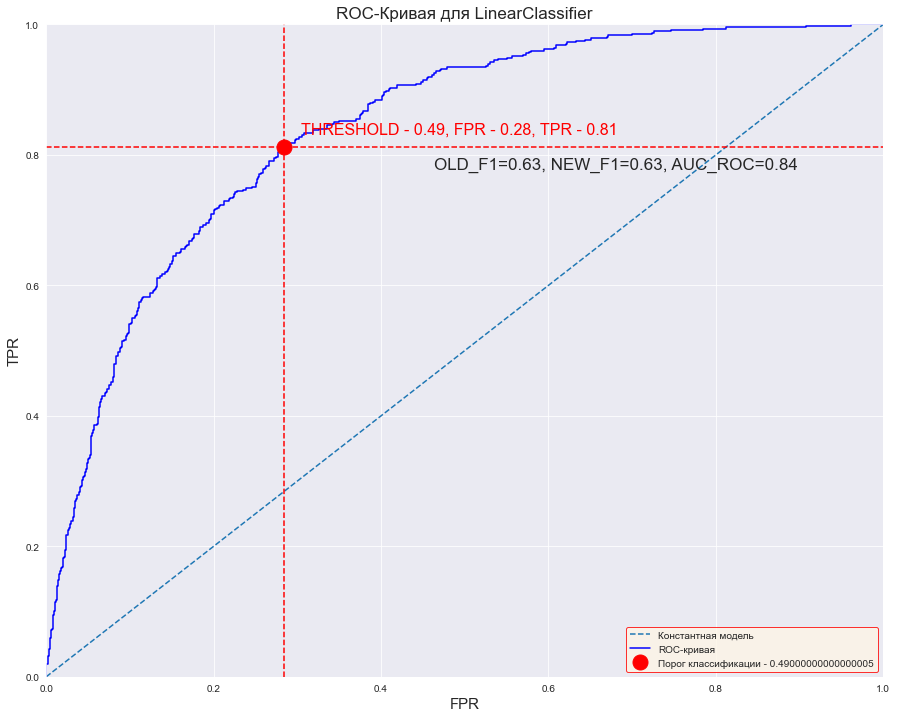

In [114]:
old_f1_test_lr = f1_score(y_test, test_model_lr.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_lr, best_threshold_lr, best_test_f1], probabilities_one_test_lr, 'LinearClassifier')

In [115]:
dct_with_models_param['LR'].update(best_threshold=best_threshold_lr, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель DecisionTreeClassifier

In [138]:
start_time = time.time()
probalities_test_dtc = test_model_dtc.predict_proba(x_test)
probabilities_one_test_dtc = probalities_test_dtc[:,1]
best_test_f1, best_threshold_dtc = get_best_threshold(probabilities_one_test_dtc)
end_time = time.time()
test_time = (end_time - start_time) / 60

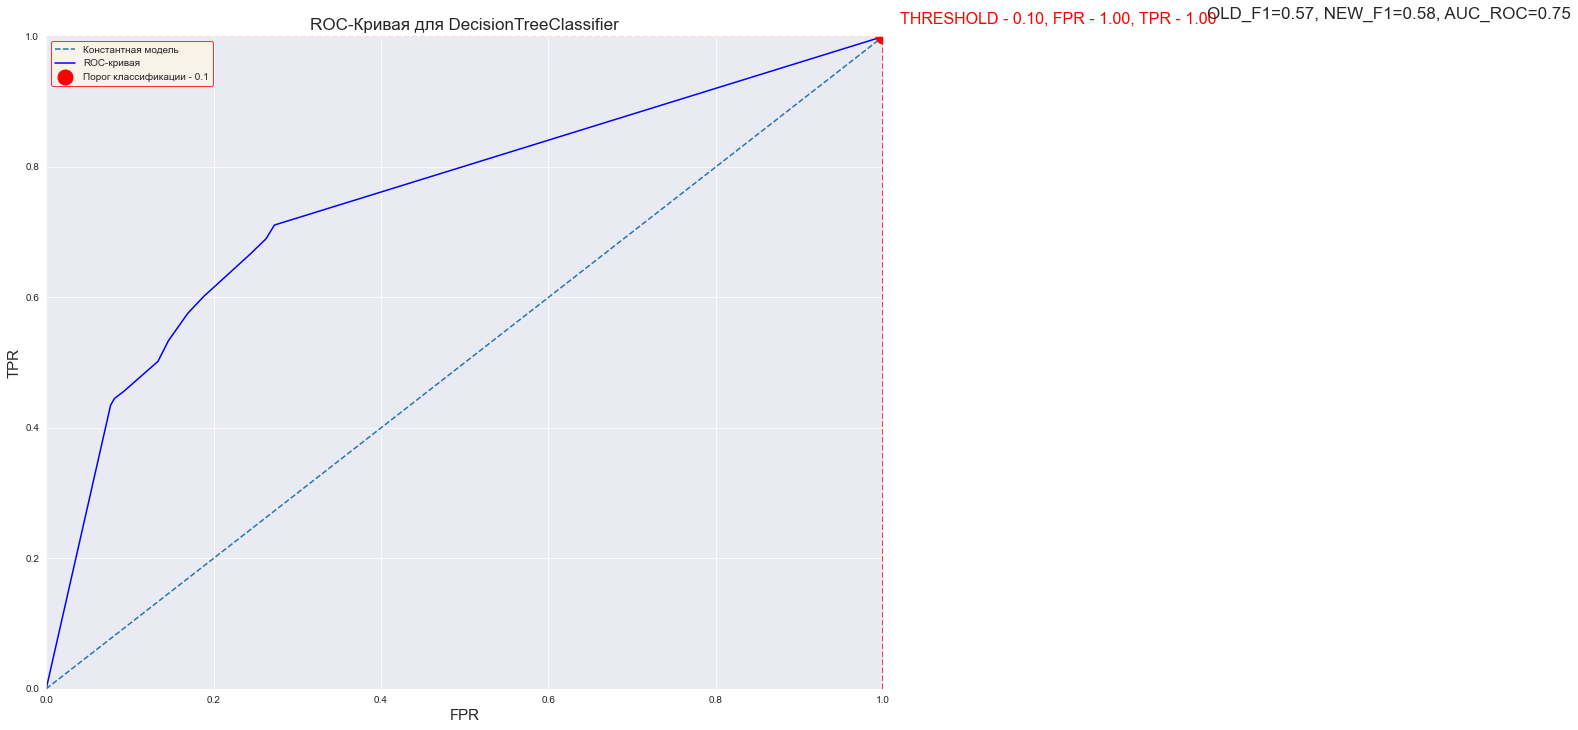

In [139]:
old_f1_test_dtc = f1_score(y_test, test_model_dtc.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_dtc, best_threshold_dtc, best_test_f1], probabilities_one_test_dtc, 'DecisionTreeClassifier')

In [118]:
dct_with_models_param['DTC'].update(best_threshold=best_threshold_dtc, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель LinearSVC

In [119]:
%%time
start_time = time.time()
dct_with_models_param['LinearSVC'].update(test_auc_roc=roc_auc_score(y_test, test_model_lsvc.predict(x_test)))
end_time = time.time()
test_time = (end_time - start_time) / 60
dct_with_models_param['LinearSVC'].update(test_time=test_time)

CPU times: user 3.97 ms, sys: 1.53 ms, total: 5.51 ms
Wall time: 4.15 ms


#### Модель MultinomialNB

In [120]:
start_time = time.time()
probalities_test_mnb = test_model_mnb.predict_proba(x_test)
probabilities_one_test_mnb = probalities_test_mnb[:,1]
best_test_f1, best_threshold_mnb = get_best_threshold(probabilities_one_test_mnb)
end_time = time.time()
test_time = (end_time - start_time) / 60

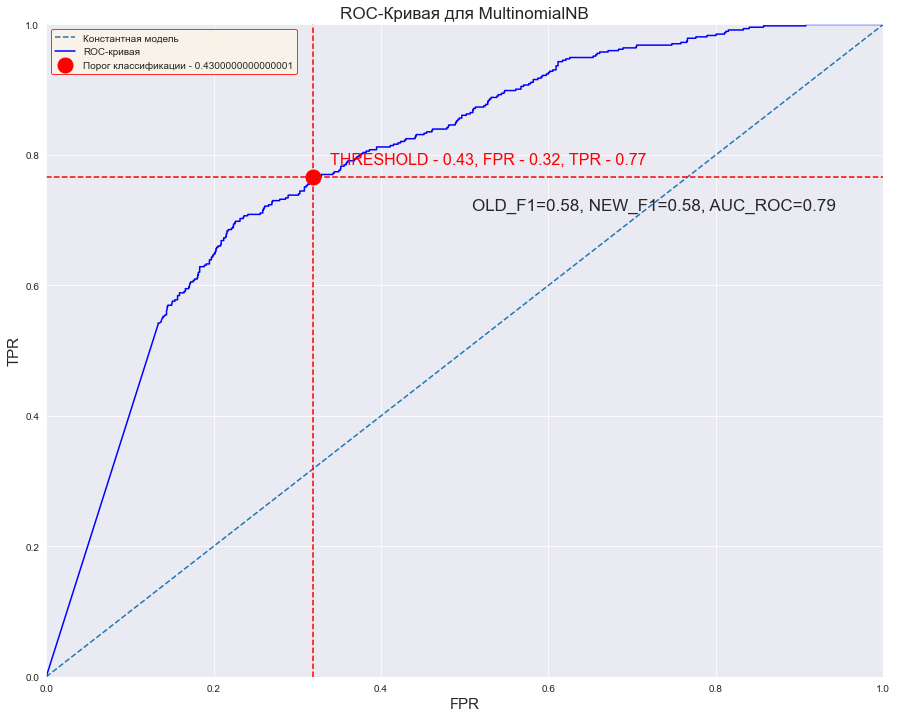

In [121]:
old_f1_test_mnb = f1_score(y_test, test_model_mnb.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_mnb, best_threshold_mnb, best_test_f1], probabilities_one_test_mnb, 'MultinomialNB')

In [122]:
dct_with_models_param['MNB'].update(best_threshold=best_threshold_mnb, test_auc_roc=test_auc_roc, test_time=test_time)

#### Модель KNeighborsClassifier

In [123]:
start_time = time.time()
probalities_test_knb = test_model_knb.predict_proba(x_test)
probabilities_one_test_knb = probalities_test_knb[:,1]
best_test_f1, best_threshold_knb = get_best_threshold(probabilities_one_test_knb)
end_time = time.time()
test_time = (end_time - start_time) / 60

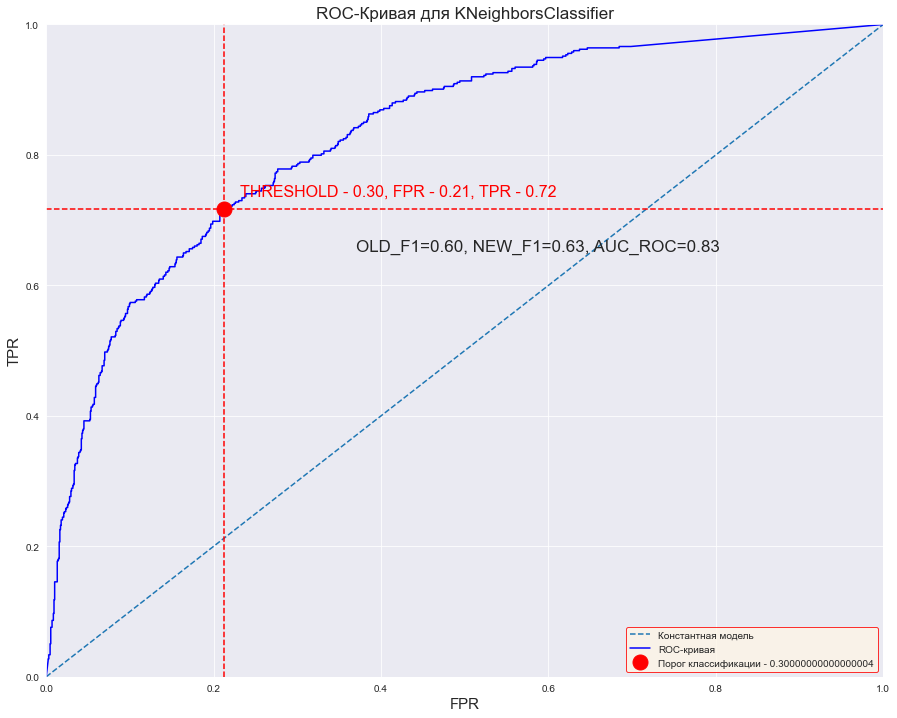

In [124]:
old_f1_test_knb = f1_score(y_test, test_model_knb.predict(x_test))
test_auc_roc = draw_graph_roc_curve([old_f1_test_knb, best_threshold_knb, best_test_f1], probabilities_one_test_knb, 'KNeighborsClassifier')

In [125]:
dct_with_models_param['KNB'].update(best_threshold=best_threshold_knb, test_auc_roc=test_auc_roc, test_time=test_time)

### Вывод

In [126]:
model = []
train_auc_roc = []
test_auc_roc = []
train_time = []
test_time = []
search_time = []
for k in dct_with_models_param.keys():
    model.append(k)
    train_auc_roc.append(dct_with_models_param[k]['train_roc_auc'])
    test_auc_roc.append(dct_with_models_param[k]['test_auc_roc'])
    search_time.append(dct_with_models_param[k]['search_time'])
    train_time.append(dct_with_models_param[k]['train_time'])
    test_time.append(dct_with_models_param[k]['test_time'])

In [127]:
results = {
    'Model' : model,
    'Train AUC_ROC' :pd.Series(train_auc_roc),
    'Test AUC_ROC' :pd.Series(test_auc_roc),
    'Search time' :pd.Series(search_time),
    'Train time' :pd.Series(train_time),
    'Test time' :pd.Series(test_time)}

In [128]:
display(pd.DataFrame(results).style.highlight_max(color='green'))

,Model,Train AUC_ROC,Test AUC_ROC,Search time,Train time,Test time
0,LR,0.844256,0.839474,0.020059,0.000455,0.001435
1,DTC,0.760641,0.751097,0.013365,0.000264,0.000545
2,LinearSVC,0.808483,0.726375,0.180015,0.004891,0.000068
3,MNB,0.795177,0.788804,0.002165,0.000065,0.001009
4,KNB,0.827294,0.829522,0.082319,0.000045,0.005538
5,RF,0.856551,0.852505,0.578529,0.020535,0.003971
6,CBC,0.995735,0.922004,1.073664,0.051177,0.001465
7,LGB,0.896534,0.899464,0.080025,0.105681,0.003520


**Лучший показатель у CatBoostClassifier**

**Попробуем улучшить метрику модели, удалив малозначимые признаки.**

In [129]:
features_for_cat = test_cat.get_feature_importance(train_pool, prettified = True)

**Рассмотрим значения признаков.**

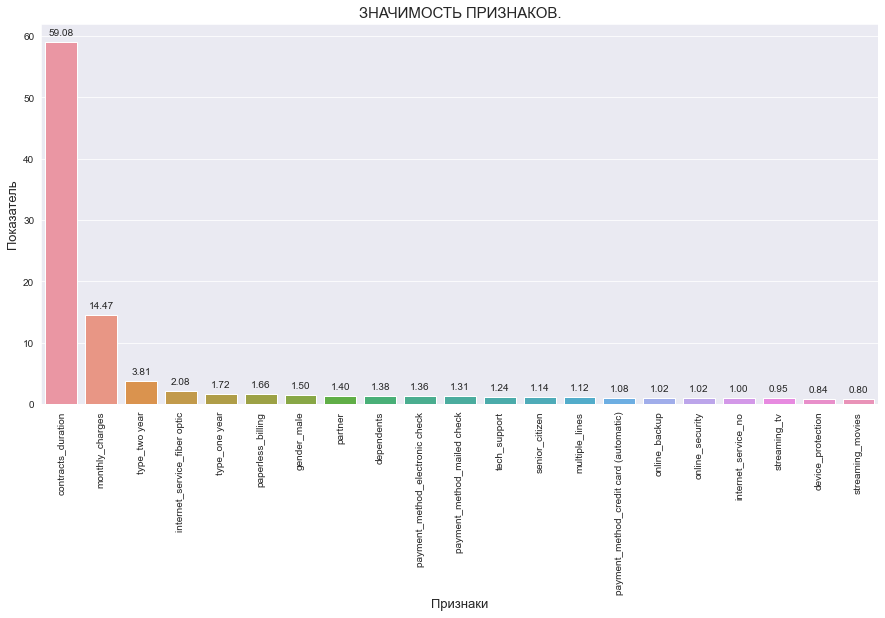

In [130]:
plt.figure(figsize=[15, 7])
sns.set_style('darkgrid')
plt.title('ЗНАЧИМОСТЬ ПРИЗНАКОВ.', fontsize=15)
splot = sns.barplot(x='Feature Id', y='Importances', data=features_for_cat.reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Показатель', fontsize=13)
plt.xlabel('Признаки', fontsize=13)
plt.xticks(rotation=90);

**Признаки с коэффицентом ниже 1.5 слабозначимые для модели, и на уход клиента не повлияют.**

**Сформируем новые датасеты, учитывая важность признаков**

In [131]:
importances_features = features_for_cat.set_index('Feature Id').query('Importances > 1.5')

In [132]:
del train_pool

In [133]:
new_x_train = x_train[importances_features.index]
new_train_pool_for_cat = Pool(new_x_train, y_train)

new_x_test = x_test[importances_features.index]
new_test_pool_for_cat = Pool(new_x_test, y_test)

In [134]:
%%time
cat_for_search = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='AUC:hints=skip_train~false',
                                    auto_class_weights='Balanced',
                                    verbose=False)
params = {"depth": range(3,15,3), 'learning_rate': [0.01, 0.02, 0.03], 'iterations': [500, 1000]}
grid_search_results = cat_for_search.grid_search(params, new_train_pool_for_cat, cv=5, verbose=False,  plot=False)


bestTest = 0.8534471481
bestIteration = 493


bestTest = 0.8609670517
bestIteration = 494


bestTest = 0.8673025529
bestIteration = 499


bestTest = 0.861139923
bestIteration = 997


bestTest = 0.8808028706
bestIteration = 999


bestTest = 0.8932028855
bestIteration = 998


bestTest = 0.8580235666
bestIteration = 499


bestTest = 0.8701806272
bestIteration = 499


bestTest = 0.8847485423
bestIteration = 499


bestTest = 0.8705030089
bestIteration = 999


bestTest = 0.8973167564
bestIteration = 988


bestTest = 0.9101839912
bestIteration = 999


bestTest = 0.8593644876
bestIteration = 491


bestTest = 0.8696433244
bestIteration = 498


bestTest = 0.886813654
bestIteration = 499


bestTest = 0.8719467182
bestIteration = 999


bestTest = 0.8949993459
bestIteration = 998


bestTest = 0.9039372617
bestIteration = 997


bestTest = 0.8562621477
bestIteration = 495


bestTest = 0.8688770838
bestIteration = 498


bestTest = 0.879730601
bestIteration = 499


bestTest = 0.8657140054
bestIteratio

In [135]:
%%time
new_test_cat = CatBoostClassifier(depth=grid_search_results['params']['depth'],
                                  iterations=grid_search_results['params']['iterations'],
                                  learning_rate=grid_search_results['params']['learning_rate'],
                                  loss_function='Logloss',
                                  auto_class_weights='Balanced',
                                  verbose=False)                        
new_test_cat.fit(new_train_pool_for_cat)

CPU times: user 8.55 s, sys: 651 ms, total: 9.2 s
Wall time: 2.72 s


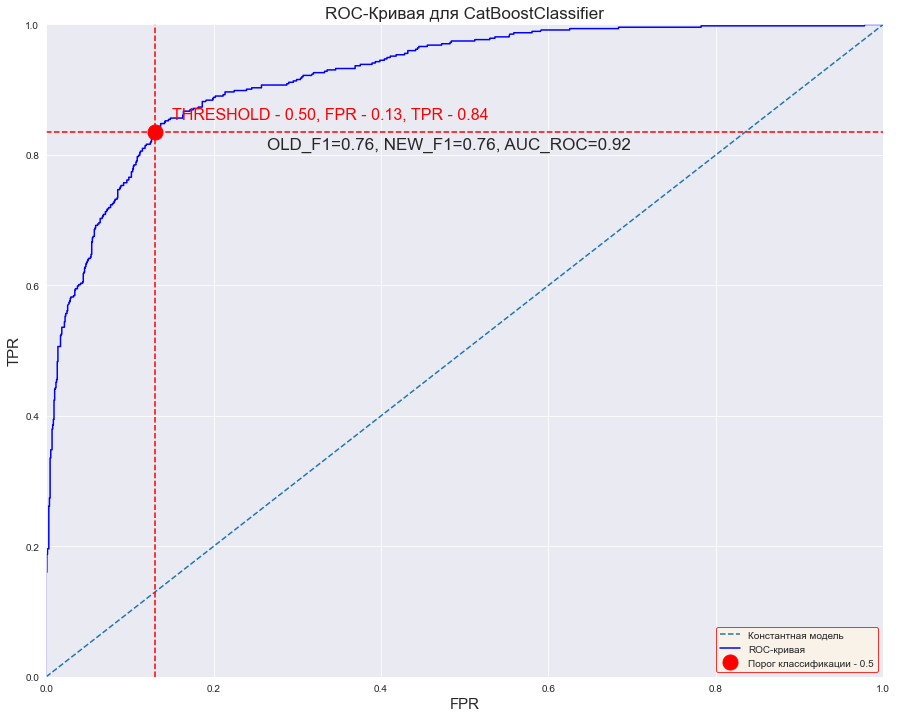

In [136]:
probalities_test_new_cbc = new_test_cat.predict_proba(new_x_test)
probabilities_one_test_new_cbc = probalities_test_new_cbc[:,1]
old_f1_test_new_cbc = f1_score(y_test, new_test_cat.predict(new_x_test))
best_test_f1, best_threshold_new_cbc = get_best_threshold(probabilities_one_test_new_cbc)
test_auc_roc = draw_graph_roc_curve([old_f1_test_new_cbc, best_threshold_new_cbc, best_test_f1], probabilities_one_test_new_cbc, 'CatBoostClassifier')

In [142]:
old_val = dct_with_models_param['CBC']['test_auc_roc']
new_val = roc_auc_score(y_test, probabilities_one_test_new_cbc)

In [148]:
print(f'\nЗНАЧЕНИЕ ROC_AUC ДО - {old_val:.4f} | ЗНАЧЕНИЕ ROC_AUC ПОСЛЕ - {new_val:.4f}')


ЗНАЧЕНИЕ ROC_AUC ДО - 0.9220 | ЗНАЧЕНИЕ ROC_AUC ПОСЛЕ - 0.9225


**Значение метрики ROC_AUC лучшей модели CatBoostClassifier удалось увеличить на 0.0005**

## Отчет

1. **Все намечанные шаги были выполнены.**


2. **Наибольшее затруднение вызвал шаг: "Исследовательский анализ данных."
     На данном шаге так же необходимо правильно выявить закономерности взаимовляния факторов. Отделить негативно влияющие на итоговое качество модели факторы, так и малозначимые.**
     
     
<u>***Для решения использовал:***</u>
     
     
   - ***тепловую карту для матрицы корреляции, что бы наглядно визуализировать корреляции между количественными признаками***
      
      
   - ***боксплот для выявления аномалий и выбросов в количественных переменных***
      
      
   - ***построение гистограм для оценки распределения, выявления тенденций/событий***
      
      
   - ***группировка данных по определенному признаку( например, по году подключения или типу оплаты) и визуализация***
      
      
   - ***столбчатую диаграмму для оценки баланса классов в целевом признаке***
      
      
   - ***метод plot для построения визуализации по сгруппированным данным***
      
      
   - ***удаление негативных/малозначимых признаков, добавление новых***
      
      
Отмечу, что для повышения финального показателя метрики лучше модели, помимо подбора параметров и порога классификации, отдельно использовал оценку важности признаков для модели. На 0.005 метрику получилось улучшить. (Не самое высокое значение, но считаю, что такое улучшение метрики будет положительно влиятить на качество работы модели)
      
      
3. **Все шаги плана считаю важными:**

   <u>**Отдельно выделю:**</u>


   - **"Изучение технического задания и постановка задачи"** - Уточнение запроса и формирование образа конечного   результата, определение ключевой метрики для оценки качества будущей модели.


   - **"Предъобработку данных"** -  На данном этапе важно правильно обработать пропуски!
       
       
   - **"Исследовательский анализ данных."** - Установить закономерности и отделить негативные признаки. Наметить какие модели будем использовать, а так же параметры для них.
       
       
   - **"Подготовка прототипа решения"**. - Правильно подобрать значение параметров для моделей, порог классификации.
       
       
   - **"Тестирование"** - Сравнить модели и выбрать лучшие по метрике и времени быстродействия.
       
       
   Так считаю нужным использование визуализации для наглядного обьяснения причин выбора решения и оформление отчетов после завершение каждого шага.
       
       
4. **Итоговой моделью выбран CatBoostClassifier с показателем 0.9225 и быстродействием 0.001.**